In [6]:
from sweeping import Sweeper
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
sweeper = Sweeper.from_jsonfile("config.json")

In [37]:
sweeper.config_df

,dataset,attack,norm,model,binary_search_steps,loss_f,steps,α_final,α_init,γ_final,γ_init,max_eps,n_iter,num_steps
0,CIFAR10,alma,L1,Augustin2020Adversarial_34_10_extra,<NA>,DL,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1000
1,CIFAR10,alma,L2,Rade2021Helper_R18_ddpm,<NA>,DL,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1000
2,CIFAR10,alma,L2,Rebuffi2021Fixing_R18_cutmix_ddpm,<NA>,DL,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1000
3,CIFAR10,apgd,Linf,Gowal2021Improving_R18_ddpm_100m,10,DL,<NA>,<NA>,<NA>,<NA>,<NA>,0.032,100,<NA>
4,CIFAR10,apgd,Linf,Rade2021Helper_R18_extra,10,DL,<NA>,<NA>,<NA>,<NA>,<NA>,0.032,100,<NA>
5,CIFAR10,fmn,L1,Augustin2020Adversarial_34_10_extra,<NA>,DL,1000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,CIFAR10,fmn,L2,Rade2021Helper_R18_ddpm,<NA>,DL,1000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,CIFAR10,fmn,L2,Rade2021Helper_R18_ddpm,<NA>,DL,100,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
8,CIFAR10,fmn,L2,Rebuffi2021Fixing_R18_cutmix_ddpm,<NA>,DL,1000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
9,CIFAR10,fmn,L2,Rebuffi2021Fixing_R18_cutmix_ddpm,<NA>,DL,100,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [38]:
sweeper.logger.load_all()

In [ ]:
sweeper.sweep(n_samples=60, recompute=False)
sweeper.save_df()

dataset                                         CIFAR10
attack                                             apgd
norm                                               Linf
model                  Gowal2021Improving_R18_ddpm_100m
binary_search_steps                                  10
loss_f                                               DL
max_eps                                           0.032
n_iter                                              100
Name: 3, dtype: object
Files already downloaded and verified


 67%|██████▋   | 2/3 [33:29<16:58, 1018.91s/it]

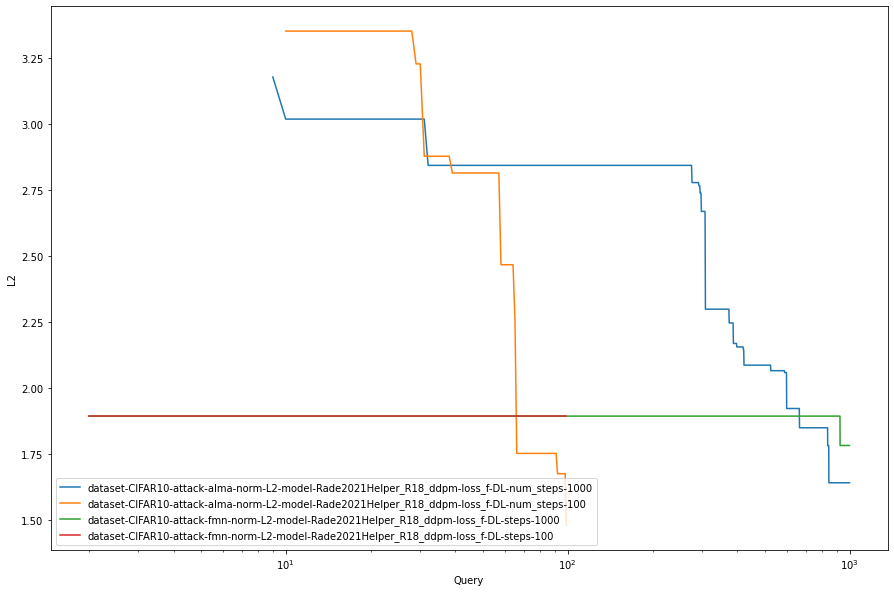

In [35]:
import matplotlib.pyplot as plt

# todo - put this into functions in some plot_utils file
# todo - support some agregation by keywords of a dict (add abstraction)
# tofo - support filtering/splitting into multiple plots (e.g. plot only one model)

plt.figure(figsize=(15,10))
keys = []
for key in sweeper.logger.dict.keys():
    if "norm-L2" in key and "steps-100" in key and "Rade" in key:
        sweeper.logger.plot_QD(key)
        keys.append(key)
plt.legend(keys)#, bbox_to_anchor =(0.65, 1.25))
plt.ylabel("L2")
plt.xlabel("Query")
plt.xscale('log')
None

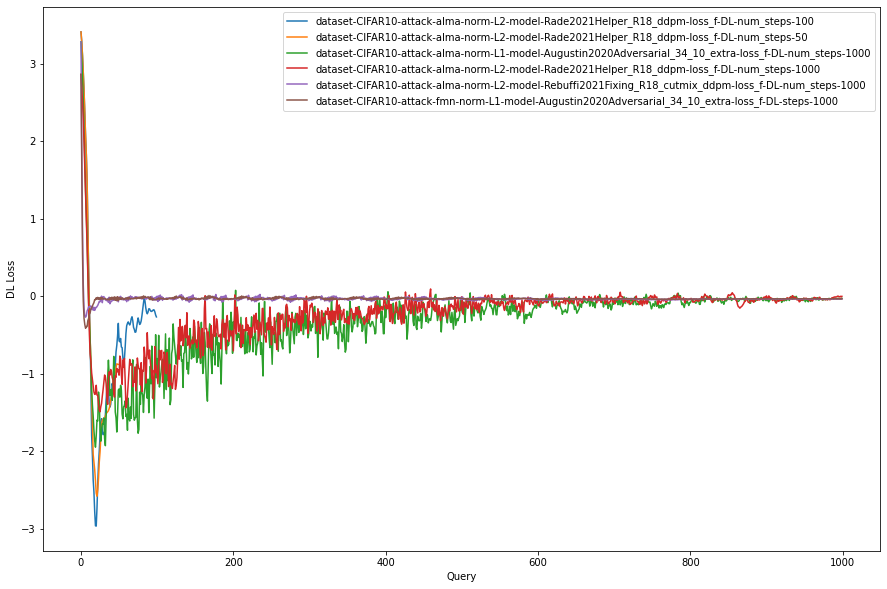

In [23]:
plt.figure(figsize=(15,10))
for key in sweeper.logger.dict.keys():
    if "norm-L2" in key:
        sweeper.logger.plot_progress(kind="loss", run_id=key)
plt.legend([*sweeper.logger.dict.keys()])#, bbox_to_anchor =(0.65, 1.25))
plt.ylabel("DL Loss")
plt.xlabel("Query")
None

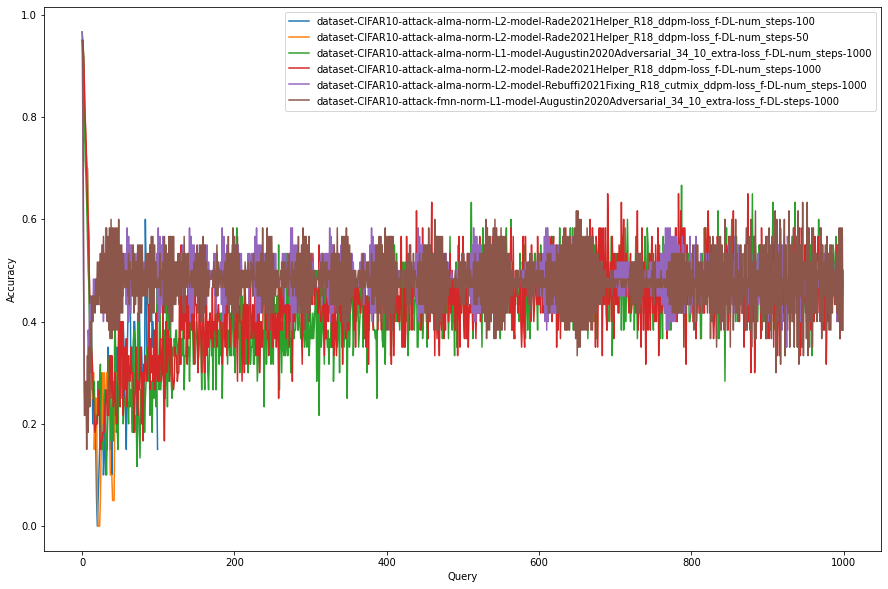

In [24]:
plt.figure(figsize=(15,10))
for key in sweeper.logger.dict.keys():
    if "norm-L2" in key:
        sweeper.logger.plot_progress(kind="acc", run_id=key)
plt.legend([*sweeper.logger.dict.keys()])#, bbox_to_anchor =(0.65, 1.25))
plt.ylabel("Accuracy")
plt.xlabel("Query")
None